In [8]:
import pandas as pd

df = pd.read_csv('fct_invoice.csv')
df

,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,229,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,3433,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,644,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,4900,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,1089,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...
99452,I219422,2344,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,172,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,425,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,577,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


In [9]:
#easy 1
unique_customers = len(df["customer_id"].unique())
print(unique_customers)

5191


In [10]:
import pandas as pd
dc = pd.read_json("dim_customer.json")
dc

,age,first_name,gender,id,last_name
0,48.0,Nicholas,M,0,Flores
1,NaN,Jeffery,M,1,Rowe
2,57.0,Alexis,F,2,Benton
3,73.0,Amy,F,3,Johnson
4,20.0,David,M,4,Moore
...,...,...,...,...,...
5186,NaN,Arthur,M,9428,Harris
5187,NaN,David,M,9494,Roy
5188,85.0,Thomas,M,10350,Turner
5189,NaN,April,F,10587,Sanchez


In [11]:
#easy 2

unique_procat = df['category'].unique()
list(unique_procat)
len(list(unique_procat))
print(unique_procat)
print(len(list(unique_procat)))

['Clothing' 'Shoes' 'Books' 'Cosmetics' 'Food & Beverage' 'Toys'
 'Technology' 'Souvenir']
8


In [12]:
#easy 3

payment_methods = df['payment_method'].value_counts()
list(payment_methods)
popu_pm = payment_methods.idxmax()
print(popu_pm)
print(max(payment_methods))

Cash
44447


In [13]:
# medium 1

df['sales']=df['quantity']*df['price']
category_sales = df.groupby('category').sum()['sales']
sorted_values = category_sales.sort_values(ascending= False)
popular_categories = sorted_values.head(3)
print(popular_categories)

category
Clothing      1.139968e+08
Shoes         6.655345e+07
Technology    5.786235e+07
Name: sales, dtype: float64


In [14]:
#medium 2

merge_dfdc = pd.merge(df,dc, left_on = "customer_id", right_on = "id")
df_45=merge_dfdc[merge_dfdc['age']>45]
sales_45= df_45["sales"].sum()
print(sales_45)

82039768.15


In [17]:
#medium 3

import matplotlib.dates as mdates
from datetime import datetime
import matplotlib.pyplot as plt

In [18]:
merge_dfdc['invoice_date'] = pd.to_datetime(merge_dfdc['invoice_date'], format='%d/%m/%Y')
merge_dfdc['year_month'] = merge_dfdc['invoice_date'].dt.strftime('%Y/%m')

Text(0.5, 1.0, 'Number of Orders')

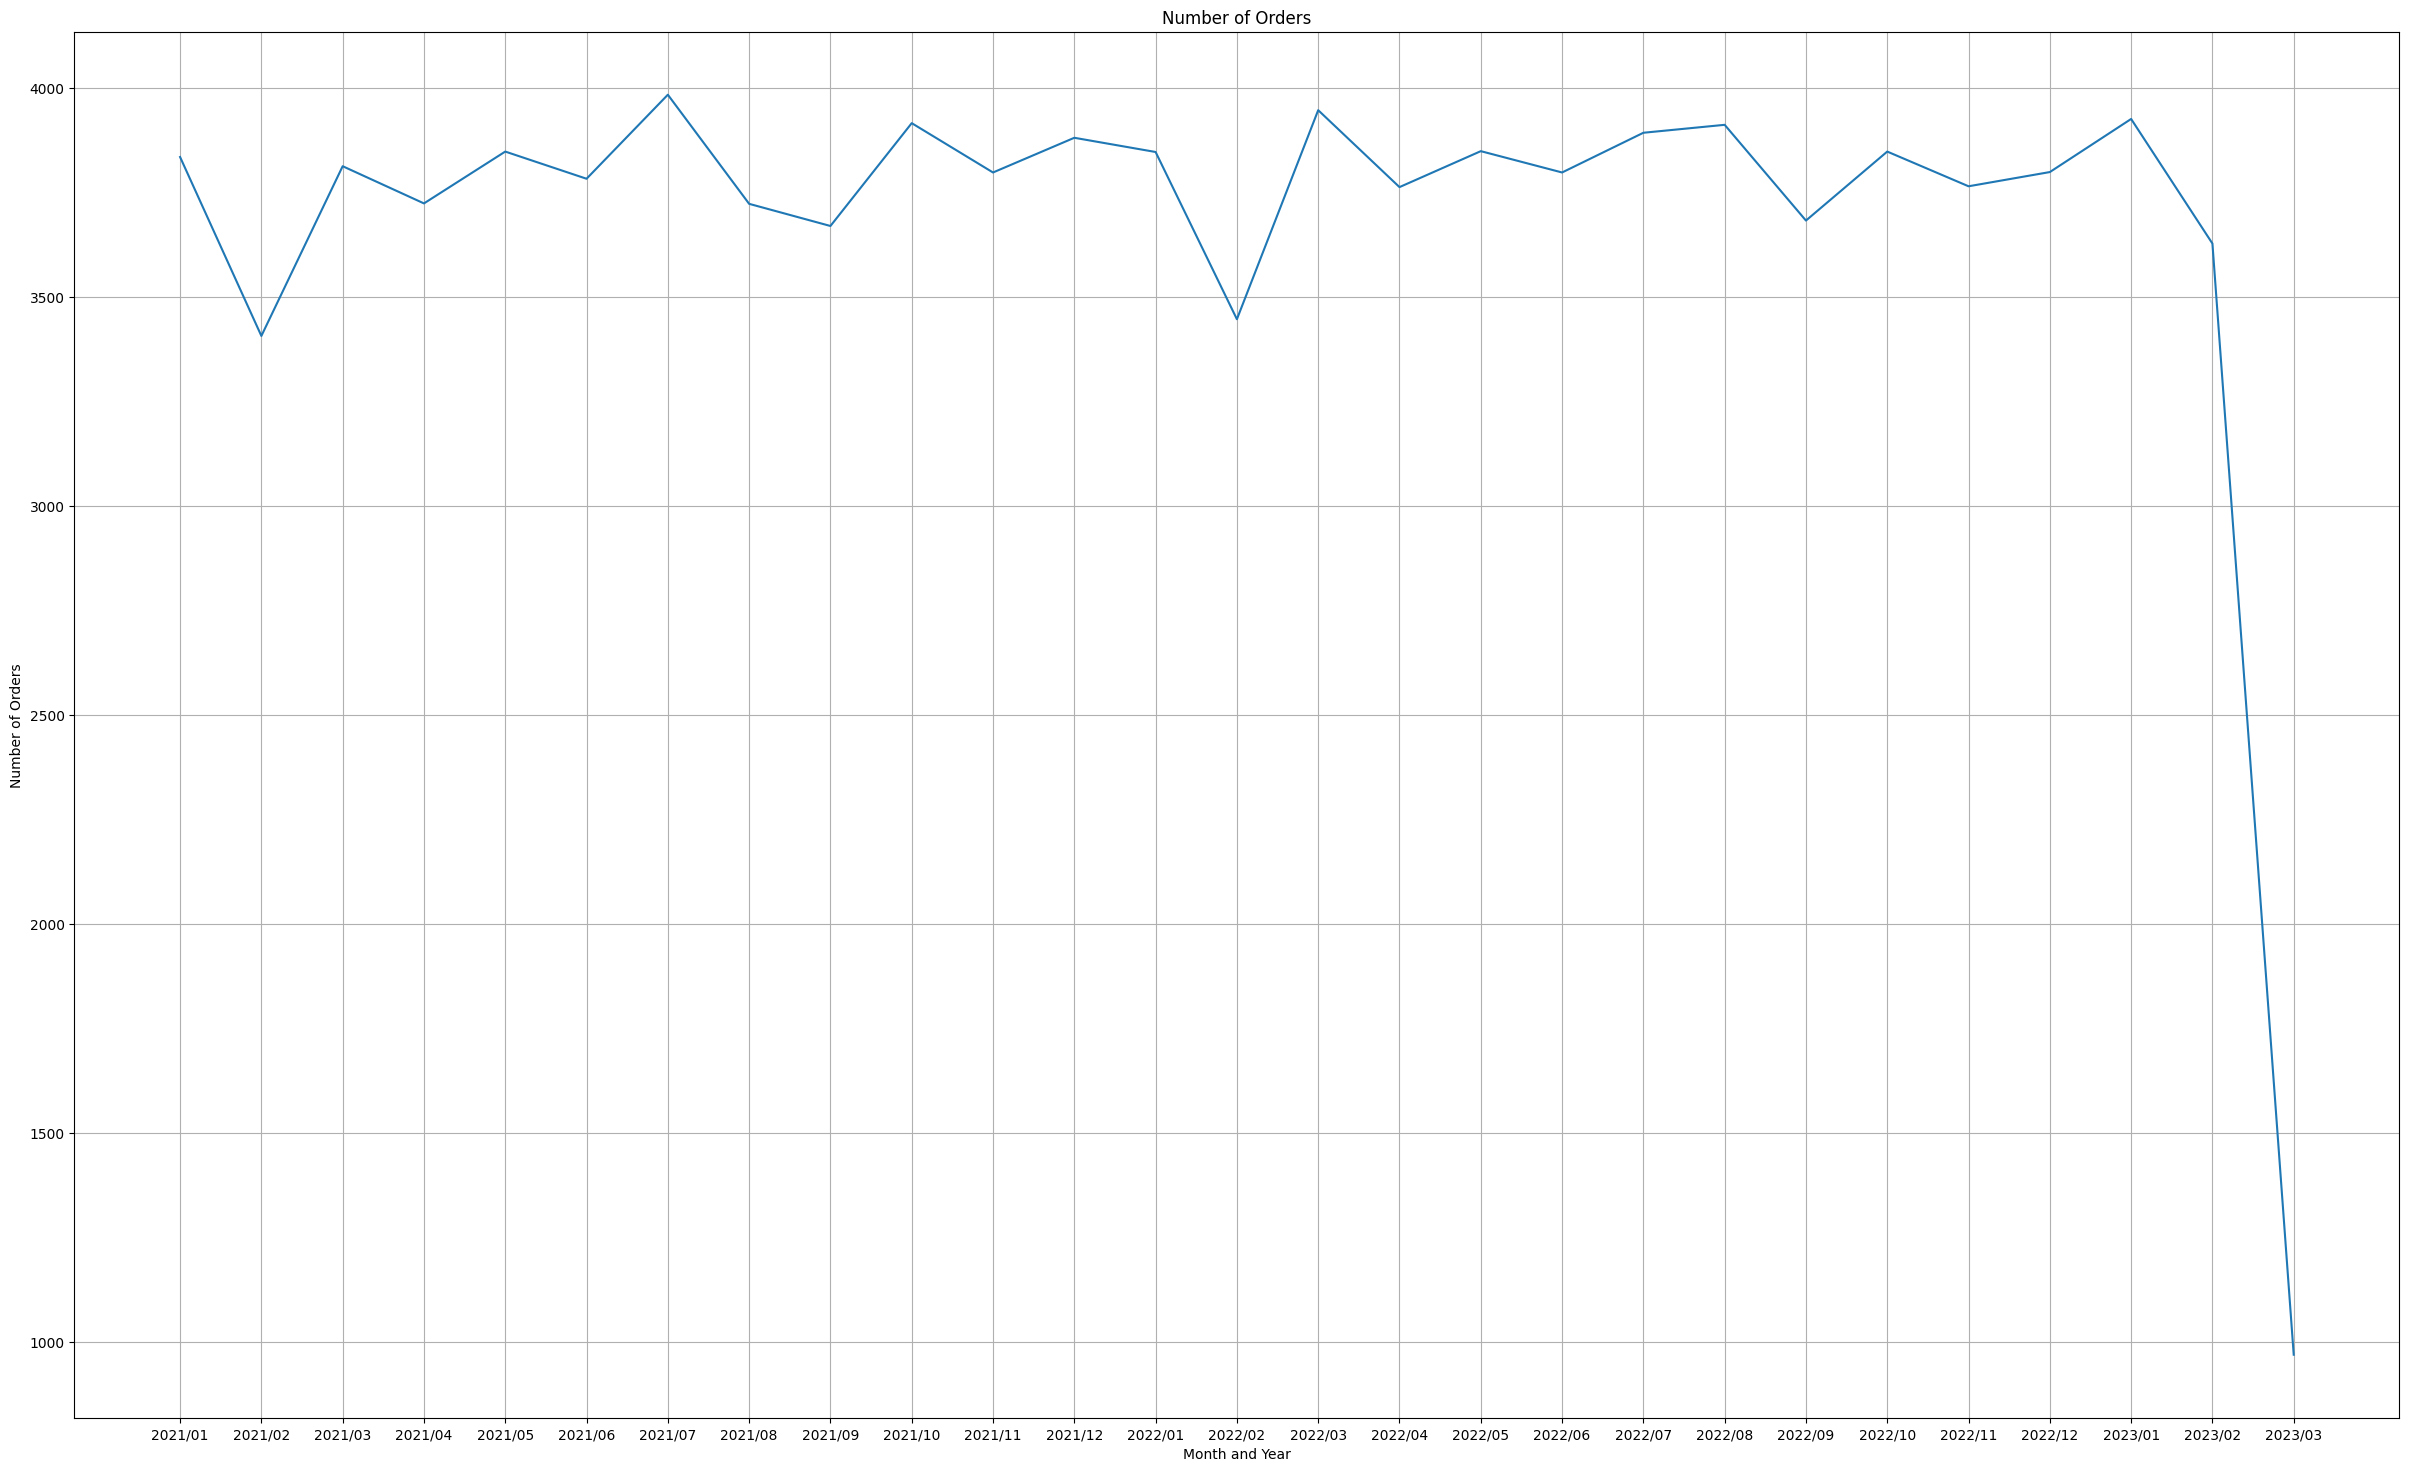

In [19]:
x = merge_dfdc.groupby(['year_month'])
y = merge_dfdc.groupby(['year_month']).count()['invoice_no']

x_values = x.groups.keys()
y_values = y.values

plt.figure(figsize=(30, 18))
plt.plot(x_values,y_values)
plt.grid()
plt.xlabel('Month and Year')
plt.ylabel('Number of Orders')
plt.title('Number of Orders')

February has the fastest rate of decline in orders from the previous month, and had the least sales and numbe of orders in both years 2021 and 2022. In the year 2023, there was a decrease in sales and number of orders from January. On the other hand, March had the sharpest increase in sales and nunber of orders from February in the years 2021 and 2022. However, the database does is incomplete, which explains the plummet of orders and sales.

In [19]:
import numpy as np

In [22]:
#hard 1

merge_dfdc=pd.merge(df[["category","sales"]],dc[["age"]],left_on=df["customer_id"],right_on=dc["id"])
age_ranges=[10, 19, 29, 39, 49, 59, 69, 79, 89]
age_groups=["10-19","20-29","30-39","40-49","50-59","60-69","70-79","80-89"]
merge_dfdc["age range"]=pd.cut(merge_dfdc["age"],bins=age_ranges,labels=age_groups)
breakdown=merge_dfdc.groupby(["category","age range"])["sales"].sum().reset_index()
pivot_table=breakdown.pivot_table(values="sales", index="category", columns="age range")
pivot_table

age range,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80-89
category,,,,,,,,
Books,12801.75,79461.75,84143.10,87203.40,74962.20,80476.80,54827.85,26664.00
Clothing,1927413.84,10250732.80,11354126.96,11215189.92,10321851.76,10660642.08,7769371.28,4493698.00
Cosmetics,109619.36,605915.32,723544.70,665034.96,587780.96,649990.76,419082.62,254531.60
Food & Beverage,13582.31,73491.96,87246.86,89553.29,72425.04,80976.09,55050.98,31332.93
Shoes,993281.35,5924878.24,7200839.66,7025590.02,5852857.84,5978893.54,4480269.05,2628744.60
Souvenir,12375.15,54943.32,64092.72,66391.80,54943.32,55025.43,38673.81,23718.06
Technology,1129800.00,5261550.00,6159300.00,5954550.00,4435200.00,5471550.00,3638250.00,1946700.00
Toys,60426.24,385100.80,420582.40,390906.88,345067.52,363955.20,273244.16,153932.80
